In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras

from keras.datasets import mnist

2024-02-11 22:10:25.113636: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-11 22:10:25.113698: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-11 22:10:25.115255: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Get the dataset

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# Function to Plot Image

In [4]:
def plot_image(i):
    plt.imshow(X_train[i], cmap='binary')
    plt.title(y_train[i])
    plt.show()

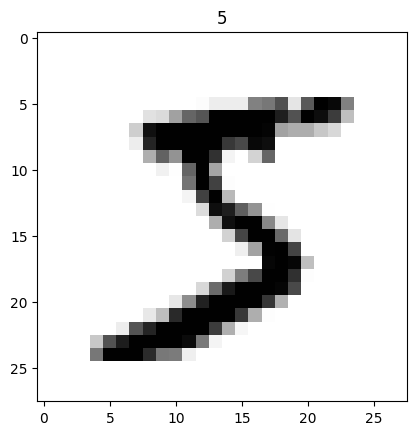

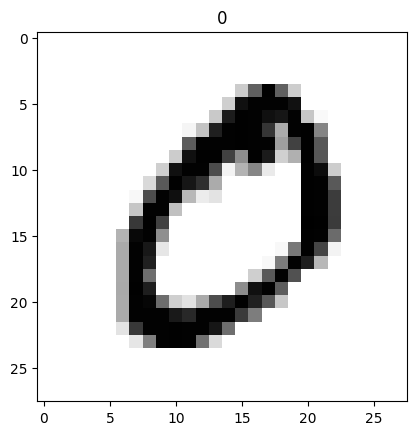

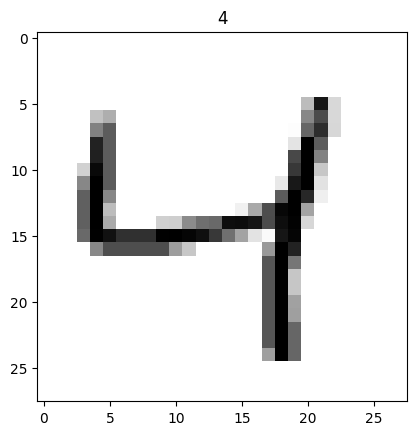

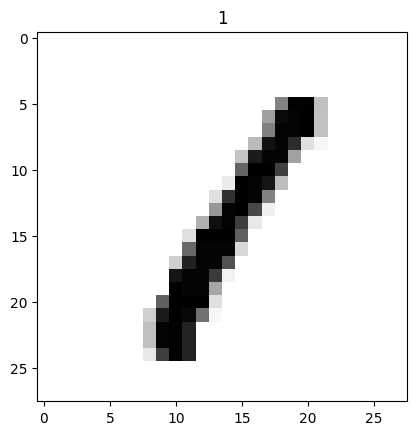

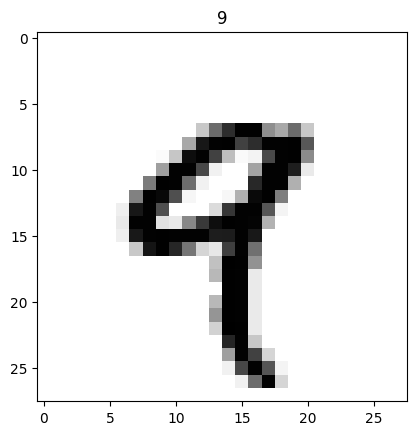

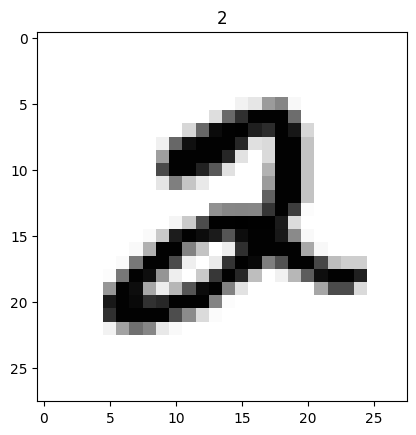

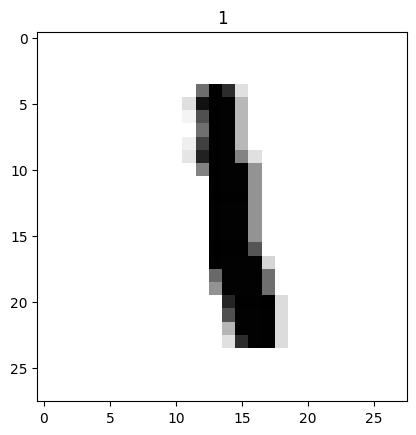

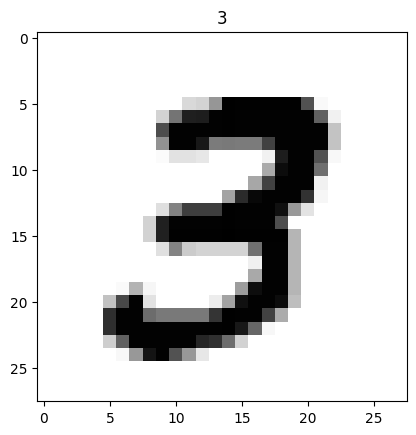

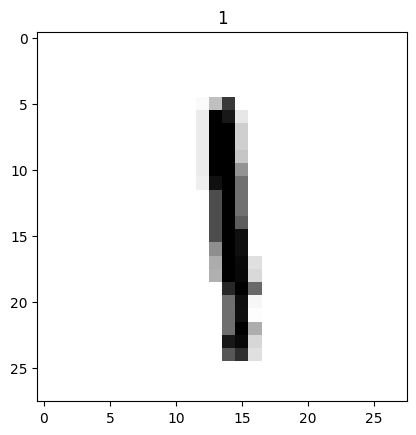

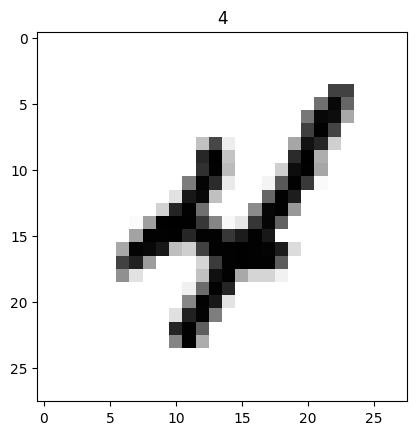

In [5]:
for i in range(10):
    plot_image(i)

In [6]:
# Pre Processing
def images_preprocessing(train,test):
    #Normalization
    train = train.astype(np.float32)/255
    test = test.astype(np.float32)/255   
    #Reshape
    train = np.expand_dims(train,-1)
    test = np.expand_dims(test,-1)
    return train,test
    

In [7]:
X_train,X_test = images_preprocessing(X_train,X_test)

In [8]:
X_train.shape,X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [9]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [10]:
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

# Model Building

In [11]:
from keras.layers import Dense,Flatten,MaxPool2D,Conv2D,Dropout
from keras.models import Sequential

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dropout(rate=0.2))

model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [14]:
from keras.optimizers import Adam
model.compile(optimizer= Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=["accuracy"])

In [ ]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=8, verbose=1, mode='auto')

# Model Training

In [15]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [16]:
# Check the shapes of the split data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (48000, 28, 28, 1)
y_train shape: (48000, 10)
X_val shape: (12000, 28, 28, 1)
y_val shape: (12000, 10)


In [17]:
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_val,y_val),
    batch_size=32
)

Epoch 1/30


2024-02-11 22:11:09.723798: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1707689471.618507    1830 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1500/1500 [==============================] - 11s 5ms/step - loss: 0.1776 - accuracy: 0.9450 - val_loss: 0.0497 - val_accuracy: 0.9864
Epoch 2/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0622 - accuracy: 0.9804 - val_loss: 0.0408 - val_accuracy: 0.9872
Epoch 3/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0455 - accuracy: 0.9856 - val_loss: 0.0337 - val_accuracy: 0.9903
Epoch 4/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0367 - accuracy: 0.9881 - val_loss: 0.0330 - val_accuracy: 0.9906
Epoch 5/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0304 - accuracy: 0.9899 - val_loss: 0.0363 - val_accuracy: 0.9895
Epoch 6/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0252 - accuracy: 0.9921 - val_loss: 0.0331 - val_accuracy: 0.9920
Epoch 7/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0226 - accuracy: 0.9925 - val_loss: 0.0314 - val_accuracy: 0.9905
Ep

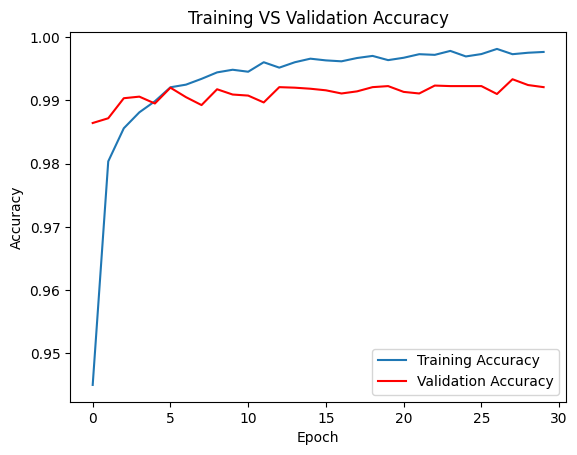

In [18]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='red', label='Validation Accuracy')

# Add labels and title
plt.title('Training VS Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show plot
plt.show()

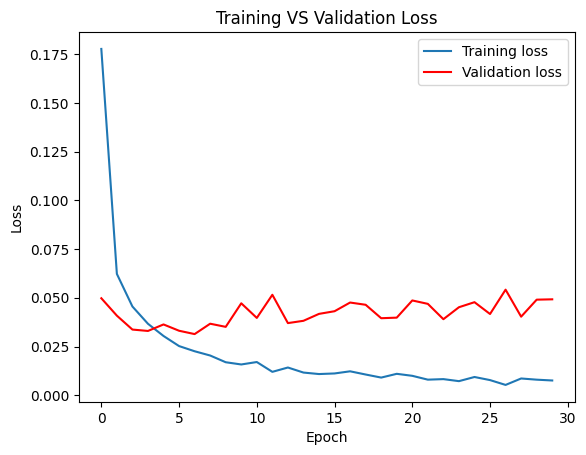

In [19]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], color='red', label='Validation loss')

# Add labels and title
plt.title('Training VS Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show plot
plt.show()


In [20]:
Train_sc = model.evaluate(X_train,y_train)
Valid_sc = model.evaluate(X_val,y_val)
Test_sc = model.evaluate(X_test,y_test)
#Print
print('Train Scores : \n    accuracy:', Train_sc[1], '\n      Loss: ', Train_sc[0], '\n')
print('Valid Scores : \n    accuracy:', Valid_sc[1], '\n      Loss: ', Valid_sc[0], '\n')
print('Test Scores : \n    accuracy:', Test_sc[1], '\n      Loss: ', Valid_sc[0], '\n')

313/313 [==============================] - 1s 4ms/step - loss: 0.0332 - accuracy: 0.9932
Train Scores : 
    accuracy: 0.9996041655540466 
      Loss:  0.0011322208447381854 

Valid Scores : 
    accuracy: 0.9920833110809326 
      Loss:  0.04919963702559471 

Test Scores : 
    accuracy: 0.9932000041007996 
      Loss:  0.04919963702559471 



In [44]:
def plot_predicted_image(image,prediction):
    plt.imshow(image, cmap='binary')
    plt.title(f"Prediction: {prediction[0]}")
    plt.show()

In [40]:
X_test_reshaped = np.expand_dims(X_test[1], axis=0)

# Now, predict using the reshaped input
y_pred = np.argmax(model.predict(X_test_reshaped), axis=1)

1/1 [==============================] - 0s 22ms/step


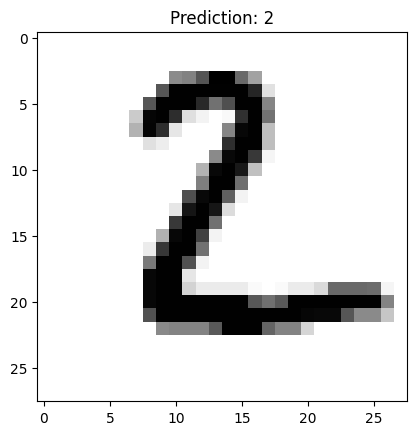

In [45]:
plot_predicted_image(X_test[1],y_pred)

1/1 [==============================] - 0s 21ms/step


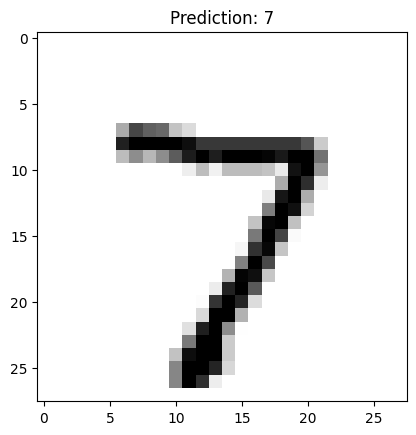

1/1 [==============================] - 0s 20ms/step


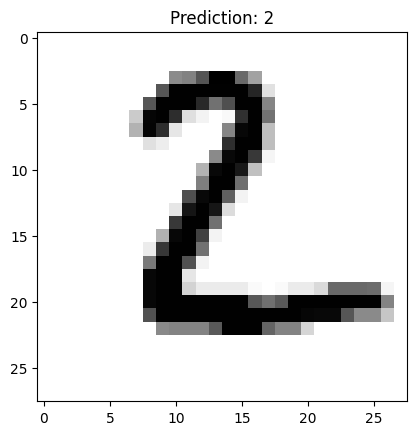

1/1 [==============================] - 0s 21ms/step


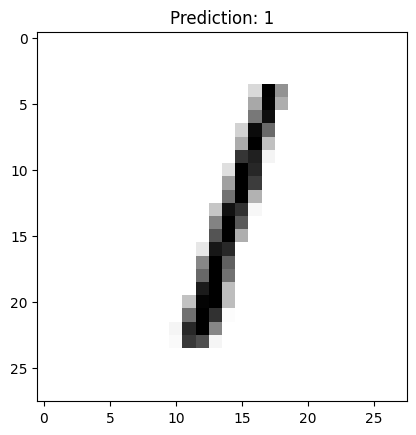

1/1 [==============================] - 0s 21ms/step


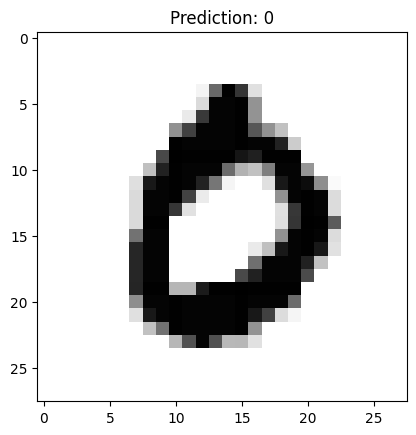

1/1 [==============================] - 0s 20ms/step


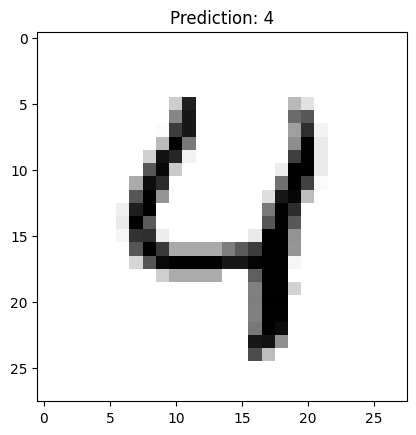

1/1 [==============================] - 0s 20ms/step


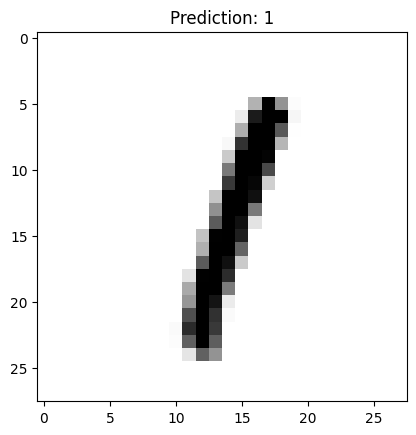

1/1 [==============================] - 0s 21ms/step


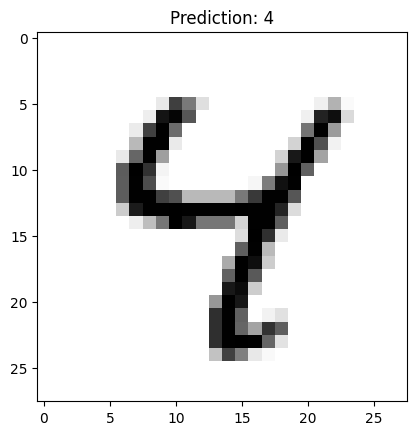

1/1 [==============================] - 0s 22ms/step


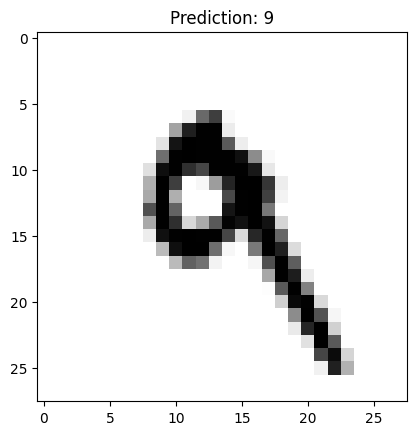

1/1 [==============================] - 0s 22ms/step


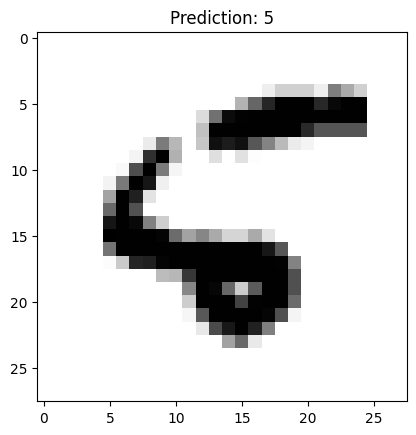

1/1 [==============================] - 0s 23ms/step


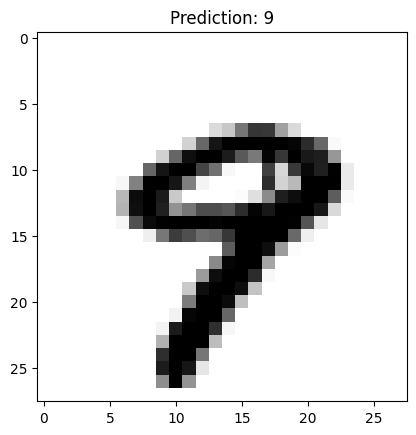

In [49]:
for i in range(10):
    X_test_reshaped = np.expand_dims(X_test[i], axis=0)
    y_pred =np.argmax(model.predict(X_test_reshaped), axis = 1)
    plot_predicted_image(X_test[i],y_pred)